                                                      **Densely Connected Neural network**

A densely connected neural network is a type of neural network where all the nodes in the previous layers are connected to to all the nodes in the subsequent layer of a neural network. A DNN is also called a multilayer perceptron.  

A densely connected neural network is used for making the predictions on a tabular data.

In Neural network, we have an input layer, one or multiple hidden layers and an output layer.  Suppose we take the example of a neural network.  In our neurl network, we have two nodes in the input layer : one hidden layer with four nodes and one output layer with the one node, since we are doing the binary classification.

For example, in a neural network, the x1 and x2 are the input features and ao is the output of the network. The only attribute we can control is the weights w1, w2 and w3 ...... w12. The idea is to find the values of the weights for which the difference is there in between the predicted output ao in this case  and the actual output (labels).

A neural network is divided into 2 types :
1. Feed Forward
2. Backpropagation

                                         **Feed Forward**

In the feed forward, the final output of a neural network is created. In our neural nwtwork, we will first find the value of zh1 which can be calculated as :

zh1 = x1 x w1 +  x2 x w2  +  b  
By using the zh1, we can find the value of ah1 :
ah1 = 1 / (1 + e ^  -zh1)  

In the same way we can find the values of ah2, ah3 and ah4. To find the value of zo, we an use the following formula :
zo = ah1 x w9  + ah2 x w10  + ah3 x w11  + ah4 x w12

Hence to find the output of neural networks and to calculate the value of ao :
ao = 1 / (1 + e^-zo)

                                                  **Back Propagation**

The purpose of back propagation is to minimize the overall loss by fitting the optimum values of weights. The loss of function we are getting, use in the function is of the mean squared error.  So basically ao is predicted from the output of our neural network and y is the actual output.

We have the weights that connect the the input features to the hidden layer and the hidden layer to the output node. We call the weights that connect the input to the hidden layer collectively as wh (w1, w2, w3....... w8) and the weights connecting the hidden layer to the output as wo(w9, w10, w11 w12).

the backpropagation will consist of the two phases. In the first phase, we will find the dcost/dwo which refers to the derivative of the total costwrt to wo, weights in the output layer.  

By chain rule, dcost/dwo can be represented as the product of the dcost/dao * dao/dzo * dzo/dwo.  

                                          dcost / dao = 1/m (ao - y)
                                    dao / dzo = sigmoid(z0) x (1 - sigmooid(zo))  

                                       dz0 / dwo = ahT

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [7]:
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow import keras
from keras.layers import Dense, Dropout, Activation
from keras.models import Model, Sequential
from keras.optimizers import Adam


In [10]:
banknote_data  =pd.read_csv('/banknotes.csv')
banknote_data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
banknote_data.shape

(1372, 5)

<Axes: xlabel='class', ylabel='count'>

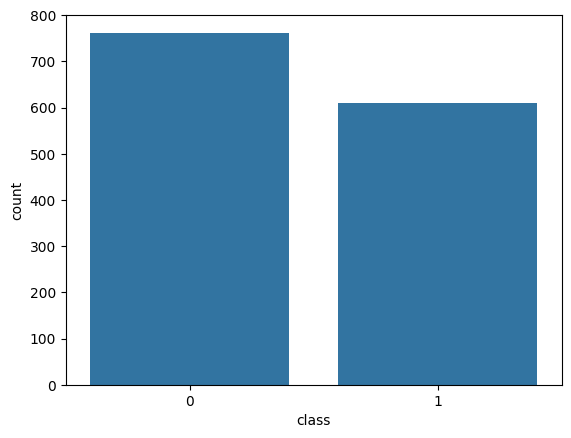

In [ ]:
sns.countplot(x = 'class', data = banknote_data)

In [15]:
x = banknote_data.drop(['class'], axis =  1)
y =  banknote_data[['class']]

In [16]:
x # the independent features

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [17]:
y # This is the label

,class
0,0
1,0
2,0
3,0
4,0
...,...
1367,1
1368,1
1369,1
1370,1


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 42)

In [ ]:
x_train # Data on which the model js trained

,variance,skewness,curtosis,entropy
529,-1.38850,12.5026,0.69118,-7.548700
243,2.77440,6.8576,-1.06710,0.075416
1309,-4.28870,-7.8633,11.83870,-1.897800
664,5.35860,3.7557,-1.73450,1.078900
745,0.75736,3.0294,2.91640,-0.068117
...,...,...,...,...
1095,1.16400,3.9130,-4.55440,-3.867200
1130,-2.29180,-7.2570,7.95970,0.921100
1294,-7.03640,9.2931,0.16594,-4.539600
860,-3.46050,2.6901,0.16165,-1.022400


In [ ]:
x_test # Data on which model is tested

,variance,skewness,curtosis,entropy
430,1.569100,6.346500,-0.1828,-2.40990
588,-0.278020,8.188100,-3.1338,-2.52760
296,0.051979,7.052100,-2.0541,-3.15080
184,-1.755900,11.945900,3.0946,-4.89780
244,2.428700,9.382100,-3.2477,-1.45430
...,...,...,...,...
1341,-2.262500,-0.099335,2.8127,0.48662
1100,1.437800,0.668370,-2.0267,1.02710
620,3.462600,-4.449000,3.5427,0.15429
617,-0.278000,8.188100,-3.1338,-2.52760


In [ ]:
y_train # Model on which data is trained

,class
529,0
243,0
1309,1
664,0
745,0
...,...
1095,1
1130,1
1294,1
860,1


In [ ]:
y_test # data on which model is tested

,class
430,0
588,0
296,0
184,0
244,0
...,...
1341,1
1100,1
620,0
617,0


In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
def create_model(learning_rate, dropout_rate):
#create sequential model
    model = Sequential()
#adding dense layers
    model.add(Dense(12, input_dim=x_train.
shape[1],  activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(6,  activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    adam = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [20]:
model = create_model(0.001,0.1)
model

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Sequential name=sequential_1, built=True>

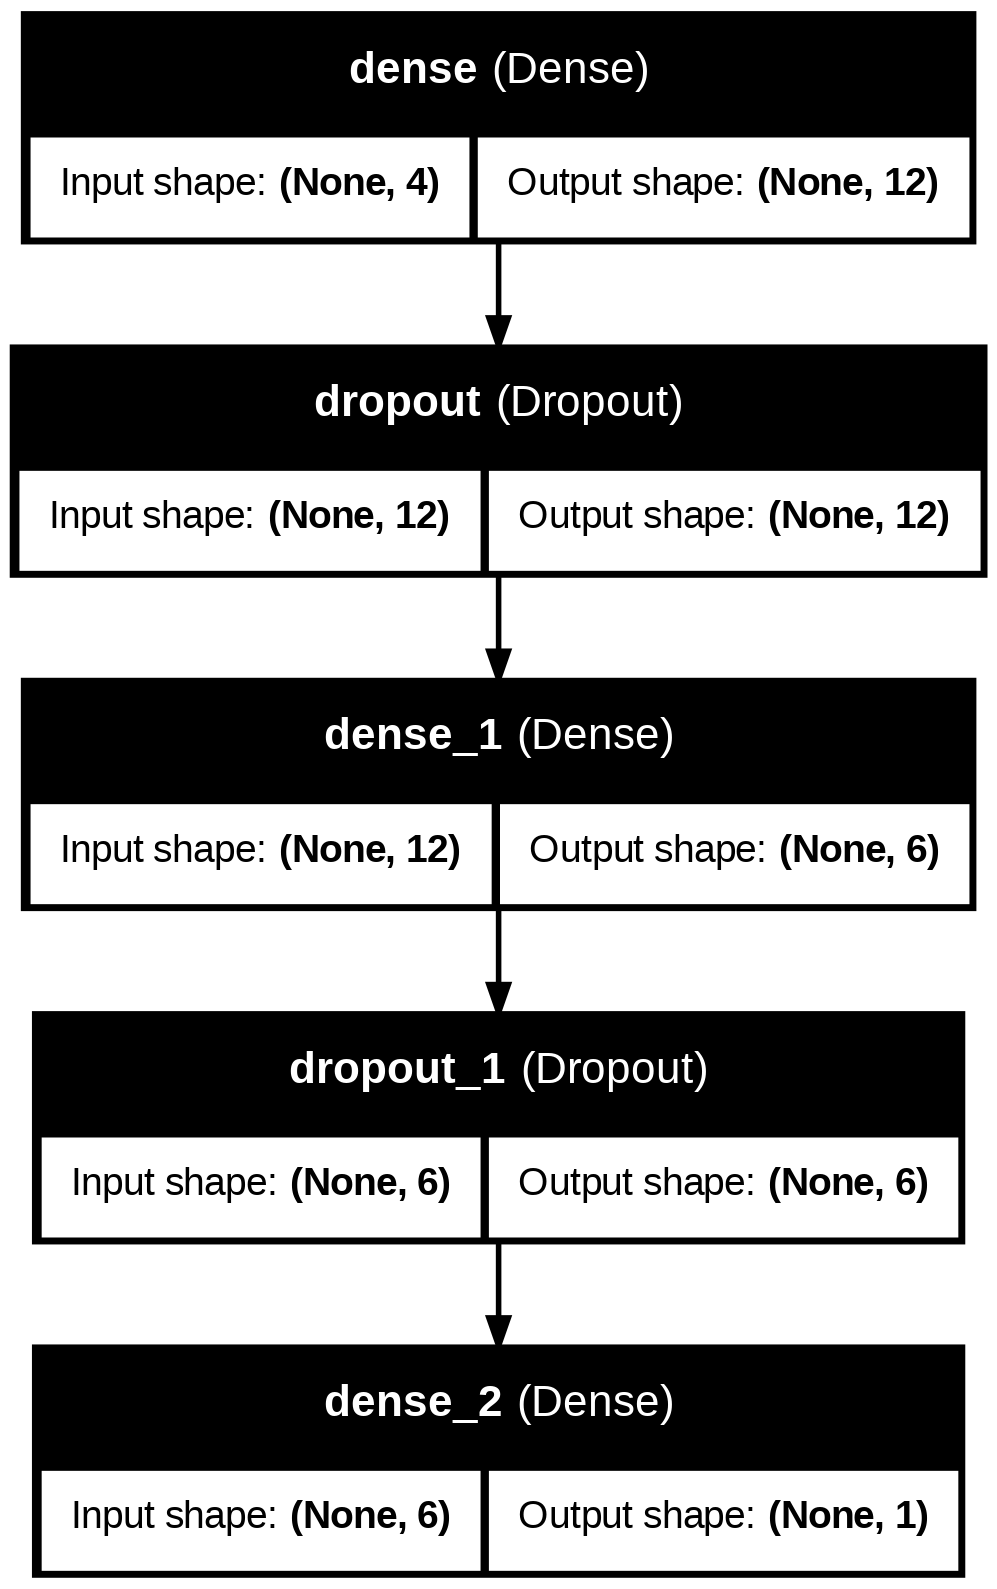

In [21]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

From the above outpuut, we can see tha that the input layer contains the four nodes, the input to the first dense layers is 4 while the utput is 12.  

Similarly, the input to the second layer is 12 while output is 6.
Fially, in the dense layer, the dense layer is 6 nodes while the output is 1 since w are making a binary classification. Also, we can see a dropout layer after each dense layer.

To train the model, we need to call the fit method on the model object. the fit mmethod takes the training features and the targets as parrameters along with the batch size, the nuber of epoochs and the validation split. The validation split refers to the split in the training data during training.  

In [22]:
model_history = model.fit(x_train, y_train, batch_size = 4, epochs = 20, validation_split = 0.2, verbose=1)
model_history

Epoch 1/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7741 - loss: 0.6076 - val_accuracy: 0.9045 - val_loss: 0.4571
Epoch 2/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9031 - loss: 0.3789 - val_accuracy: 0.9682 - val_loss: 0.2022
Epoch 3/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9249 - loss: 0.2163 - val_accuracy: 0.9818 - val_loss: 0.0910
Epoch 4/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9637 - loss: 0.1150 - val_accuracy: 0.9818 - val_loss: 0.0537
Epoch 5/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9696 - loss: 0.0964 - val_accuracy: 0.9818 - val_loss: 0.0395
Epoch 6/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9736 - loss: 0.0615 - val_accuracy: 0.9864 - val_loss: 0.0281
Epoch 7/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9757 - loss: 0.0648 - val_accuracy: 0.9818 - val_loss: 0.0272
Epoch 8/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9853 - loss: 0.0415 - val_accuracy: 0.

                          **Evaluating** **the** **Neural** **Network** **Performance**

We can evaluate the performance by making the predictions on the test set. To make the test predictions, we have to pass the set to the to evaluate() method.

In [23]:
accuracies = model.evaluate(x_test, y_test, verbose = 1)

print("Test Score: ", accuracies[0])
print("Test Accuracy:", accuracies[1])

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0056  
Test Score:  0.007422971073538065
Test Accuracy: 1.0


the output shows an accuracy of 100 percent on the test set . The loss value of 0.007427.   Lowe the loss, higher the accuracy

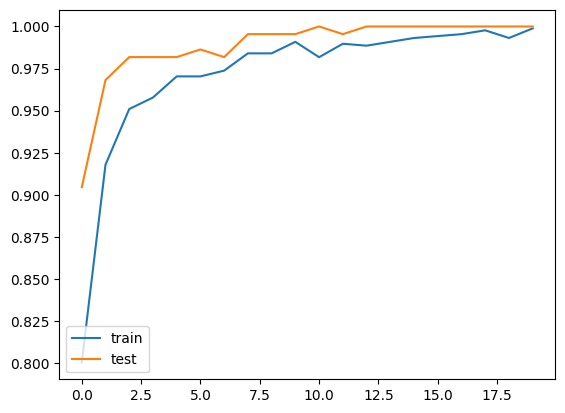

In [25]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'], label = 'accuracy')

plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')

plt.legend(['train', 'test'], loc= 'lower left')

The above curve shows that the curve meets near 1 and then becomes stable that our model is not overfitting.

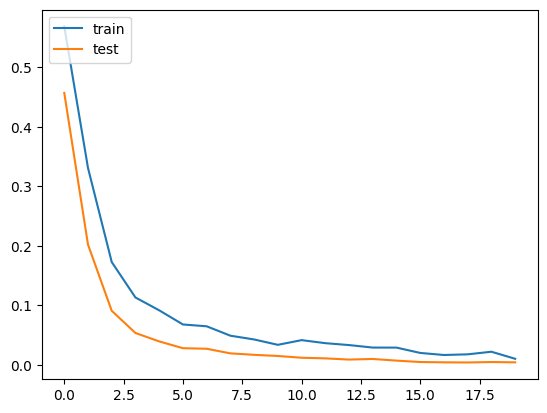

In [26]:
# Similarly the los values of the training and test sets can be printed as :
plt.plot(model_history.history['loss'], label = 'loss')
plt.plot(model_history.history['val_loss'], label = 'val_loss')

plt.legend(['train', 'test'], loc = 'upper left')

Here, we have successfully trained a neural network for the classification. In next session, we will see how to create and train a recurrent neural network for the stock price prediction.